# Digital Image Processing – Exercise 1

---
---

- install dependency library:

In [ ]:
! pip install opencv-python numpy matplotlib 

### Question 1

#### A) Describe each of the two methods (Pixel replication, Zero-order hold) for image zooming.

- pixel replication: this method enlarges the image by duplicating each pixel into a block of zoom_factor × zoom_factor pixels. for example, with zoom factor 2, each pixel becomes a 2×2 block. it is the simplest and fastest method but results in blocky artifacts. 

- zero order hold: this is essentially the same as pixel replication in the context of image zooming. the term is borrowed from signal processing, where the value is held constant until the next sample. in images, it means replicating the nearest pixel value — identical to pixel replication.

#### B)  Implement Python code to perform zooming in on the image 'einstein.jpg' using a zoom factor of 2 for each of the two methods. 

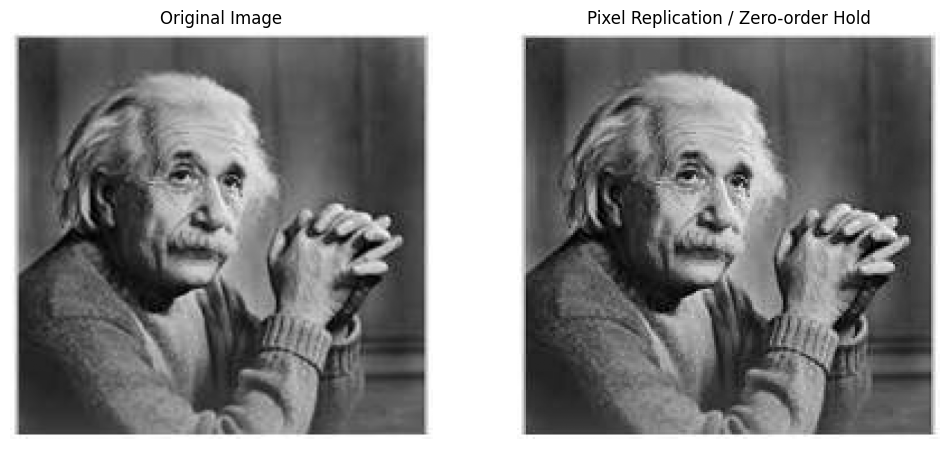

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./required-files/einstein.jpg", cv2.IMREAD_GRAYSCALE)

# get the hight and width
h, w = img.shape[:2]
zoom_factor = 2

# method 1 & 2: Pixel Replication / Zero-order Hold (same method)
zoomed2x = cv2.resize(img, (w * zoom_factor, h * zoom_factor), interpolation=cv2.INTER_NEAREST)

# show the outputs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(zoomed2x, cmap='gray')
plt.title('Pixel Replication / Zero-order Hold')
plt.axis('off')

plt.show()

# showing images with cv2
cv2.imshow("original", img)
cv2.waitKey(0)
cv2.imshow("zoomed image 2x", zoomed2x)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### C) For each of the two methods, discuss their advantages and disadvantages. Consider aspects such as image quality, computational complexity, and suitability for different types of images.

both are the same. then :
- Advantages :
    + Extremely fast
    + Simple implementation
    + Preserves original pixel values
- Disadvantages
    + Blocky appearance
    + Poor visual quality
    + Not suitable for high zoom factors


#### D) Display zoomed images and examine zoom factor 4

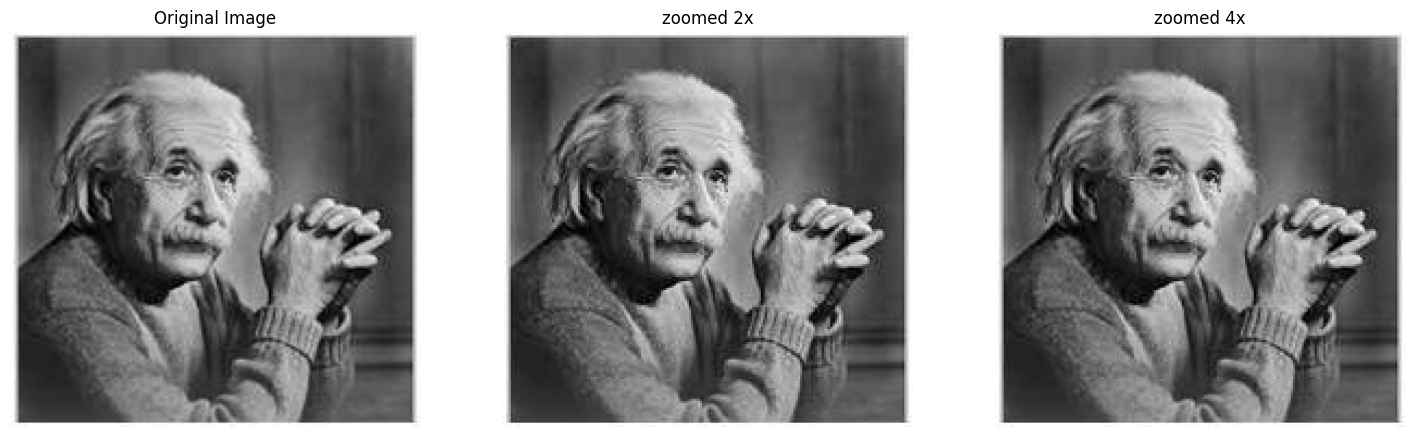

In [4]:
h, w = img.shape[:2]
zoom_factor = 4

zoomed4x = cv2.resize(img, (w * zoom_factor, h * zoom_factor), interpolation=cv2.INTER_NEAREST)

# show the outputs
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(zoomed2x, cmap='gray')
plt.title('zoomed 2x')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(zoomed4x, cmap='gray')
plt.title('zoomed 4x')
plt.axis('off')

# showing images with cv2
cv2.imshow("original", img)
cv2.waitKey(0)
cv2.imshow("zoomed image 2x", zoomed2x)
cv2.waitKey(0)
cv2.imshow("zoomed image 4x", zoomed4x)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### E)  Improved Zooming Method

- Improved method: Bilinear Interpolation:

    Bilinear interpolation produces smoother transitions between pixels by averaging neighboring values. It is visually superior and widely preferred over pixel replication for general zooming.

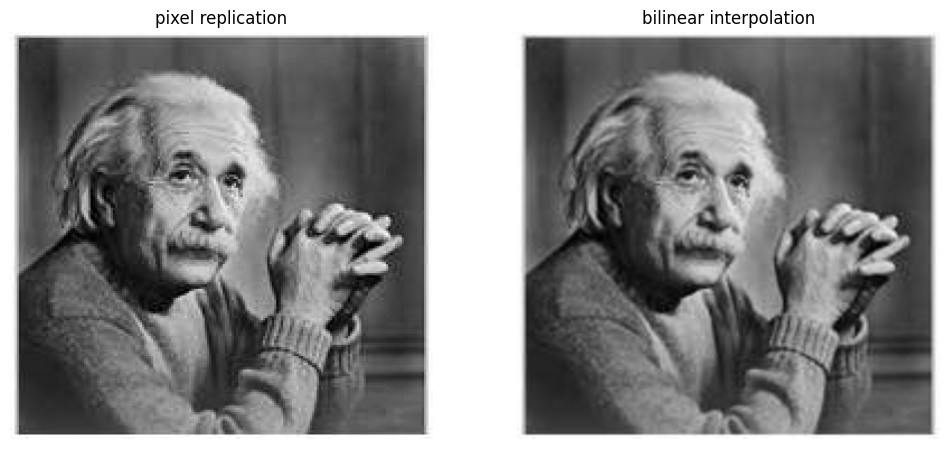

In [5]:
zoom_factor = 4
plt.figure(figsize=(12, 6))


# pixel replication
zoomed_replication = cv2.resize(img, (w * zoom_factor, h * zoom_factor), interpolation=cv2.INTER_NEAREST)
plt.subplot(1, 2, 1)
plt.imshow(zoomed4x, cmap='gray')
plt.title('pixel replication')
plt.axis('off')


# bilinear interpolation 
zoomed_bilinear = cv2.resize(img, (w * zoom_factor, h * zoom_factor), interpolation=cv2.INTER_LINEAR)
plt.subplot(1, 2, 2)
plt.imshow(zoomed_bilinear, cmap='gray')
plt.title('bilinear interpolation')
plt.axis('off')
plt.show()


# showing images with cv2
cv2.imshow("zoomed replication", zoomed_replication)
cv2.waitKey(0)
cv2.imshow("bilinear interpolation ", zoomed_bilinear)
cv2.waitKey(0)
cv2.destroyAllWindows()



---

### Question 2

#### A) Normalize the image to range (0 to 1)

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("./required-files/low_contrast.jpg", cv2.IMREAD_GRAYSCALE)

# Normalize to [0, 1]
img_norm = img.astype(np.float32) / 255.0
print(f"Min: {img_norm.min()}, Max: {img_norm.max()}")

img_norm_uint8 = np.clip(img_norm * 255, 0, 255).astype(np.uint8) 

Min: 0.3686274588108063, Max: 0.9843137264251709


#### B) Describe Logarithmic and Gamma correction

**Logarithmic Correction**:  
**Formula**: `s = c × log(1 + r)`  
- `r`: Normalized input pixel intensity ∈ [0, 1]  
- `s`: Enhanced output pixel  
- `c`: Scaling constant, chosen as `c = 1 / log(1 + max(r))` to map output to [0, 1]  
- **Effect**: Expands low-intensity values, compresses high-intensity values → ideal for dark images with high dynamic range.

**Gamma Correction**:  
**Formula**: `s = r^γ`  
- `r`: Normalized input pixel ∈ [0, 1]  
- `s`: Output pixel  
- `γ`: Gamma value  
  - `γ < 1`: Brightens dark regions  
  - `γ > 1`: Darkens bright regions  
- **Purpose**: Compensates for non-linear human brightness perception.

#### C) Apply logarithmic correction

In [7]:
# Logarithmic transformation
c = 1.0 / np.log(1 + np.max(img_norm))  # Scale to [0,1]
log_enhanced = c * np.log(1 + img_norm)

# Clip and convert to uint8 for display
log_uint8 = np.clip(log_enhanced * 255, 0, 255).astype(np.uint8)

#### D) Apply gamma correction

In [8]:
# Gamma correction (γ < 1 to brighten)
gamma_l1 = 0.4
gamma_enhanced_l1 = np.power(img_norm, gamma_l1)
gamma_uint8_l1 = np.clip(gamma_enhanced_l1 * 255, 0, 255).astype(np.uint8)

# Gamma correction (γ > 1 to brighten)
gamma_g1 = 2
gamma_enhanced_g1 = np.power(img_norm, gamma_g1)
gamma_uint8_g1 = np.clip(gamma_enhanced_g1 * 255, 0, 255).astype(np.uint8)

#### E) Plot histograms on a single figure

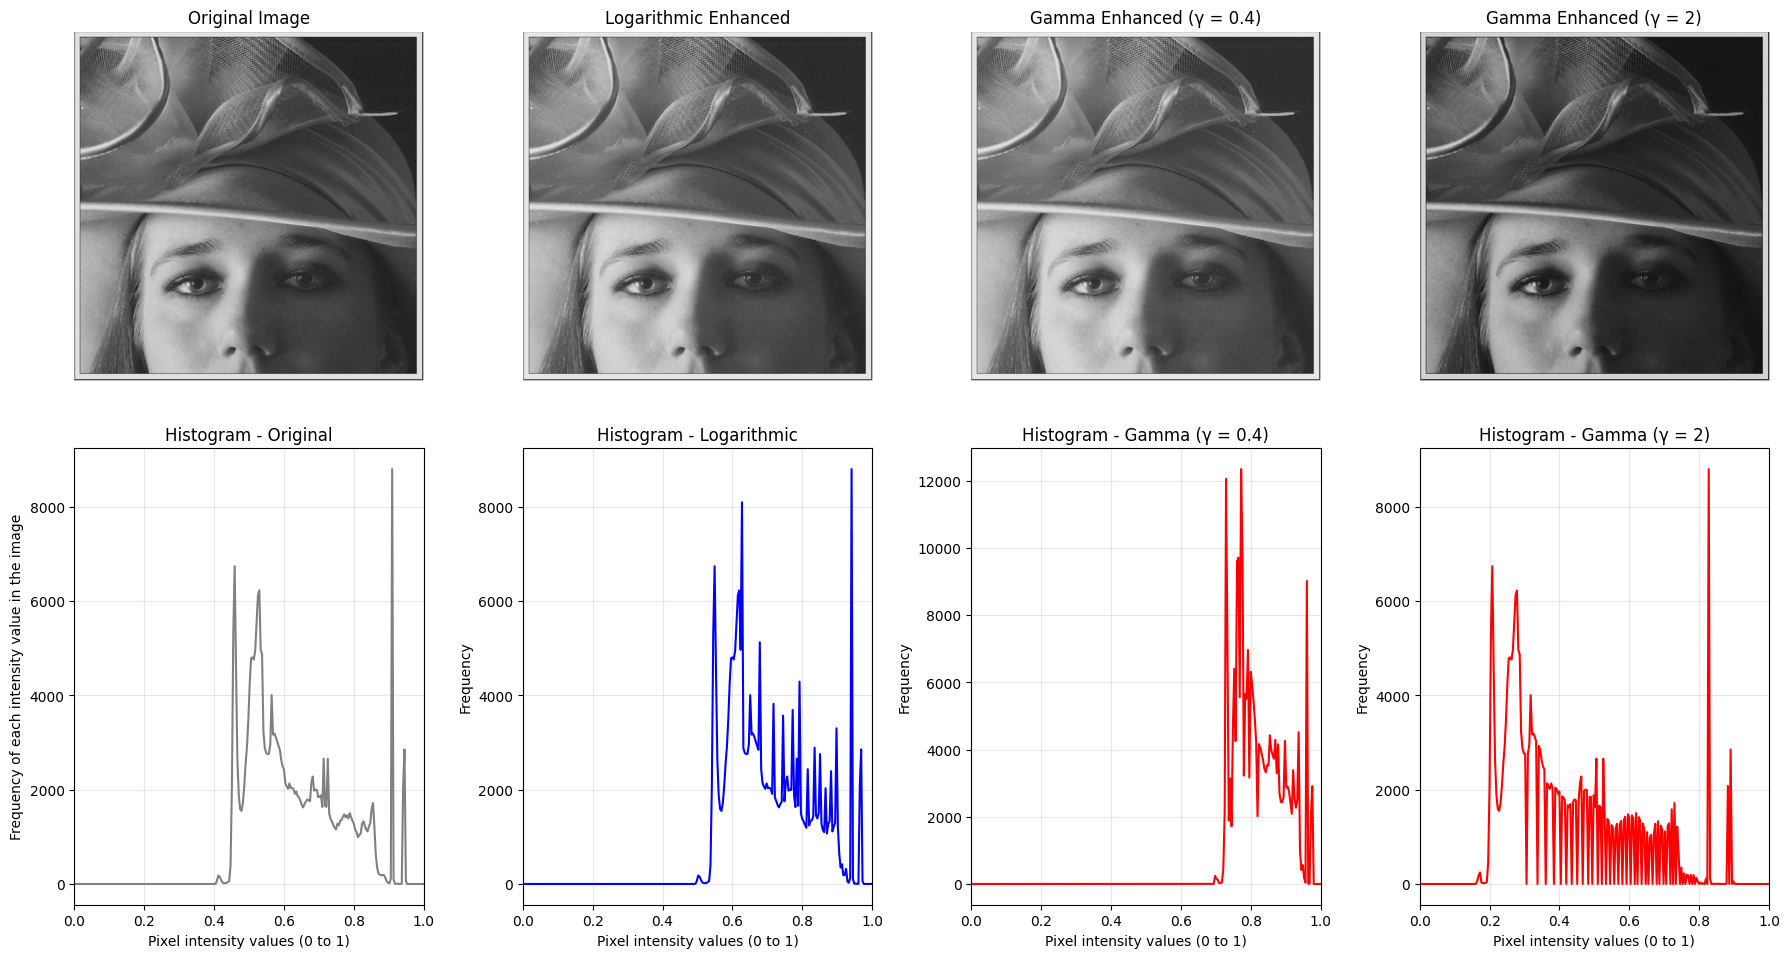

In [9]:
# calculate histogram
hist_orig  = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_log   = cv2.calcHist([log_uint8], [0], None, [256], [0, 256])
hist_gamma_l1 = cv2.calcHist([gamma_uint8_l1], [0], None, [256], [0, 256])
hist_gamma_g1 = cv2.calcHist([gamma_uint8_g1], [0], None, [256], [0, 256])

x_axis = np.arange(256) / 255.0

plt.figure(figsize=(18, 10))  

# first row : images
plt.subplot(2, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(log_uint8, cmap='gray')
plt.title('Logarithmic Enhanced')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(gamma_uint8_l1, cmap='gray')
plt.title(f'Gamma Enhanced (γ = {gamma_l1})')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(gamma_uint8_g1, cmap='gray')
plt.title(f'Gamma Enhanced (γ = {gamma_g1})')
plt.axis('off')

# second row : histograms
plt.subplot(2, 4, 5)
plt.plot(x_axis, hist_orig, color='gray', linewidth=1.5)
plt.title('Histogram - Original')
plt.xlabel('Pixel intensity values (0 to 1)')
plt.ylabel('Frequency of each intensity value in the image')
plt.xlim(0, 1)
plt.grid(True, alpha=0.3)

plt.subplot(2, 4, 6)
plt.plot(x_axis, hist_log, color='blue', linewidth=1.5)
plt.title('Histogram - Logarithmic')
plt.xlabel('Pixel intensity values (0 to 1)')
plt.ylabel('Frequency')
plt.xlim(0, 1)
plt.grid(True, alpha=0.3)

plt.subplot(2, 4, 7)
plt.plot(x_axis, hist_gamma_l1, color='red', linewidth=1.5)
plt.title(f'Histogram - Gamma (γ = {gamma_l1})')
plt.xlabel('Pixel intensity values (0 to 1)')
plt.ylabel('Frequency')
plt.xlim(0, 1)
plt.grid(True, alpha=0.3)

plt.subplot(2, 4, 8)
plt.plot(x_axis, hist_gamma_g1, color='red', linewidth=1.5)
plt.title(f'Histogram - Gamma (γ = {gamma_g1})')
plt.xlabel('Pixel intensity values (0 to 1)')
plt.ylabel('Frequency')
plt.xlim(0, 1)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# optional : show image with cv2
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.imshow("Log Enhanced", log_uint8)
cv2.waitKey(0)
cv2.imshow("Gamma Enhanced (gamma < 1)", gamma_uint8_l1)
cv2.waitKey(0)
cv2.imshow("Gamma Enhanced (gamma > 1)", gamma_uint8_g1)
cv2.waitKey(0)
cv2.destroyAllWindows()

---

### Question 3

#### A) Normalize the image

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("./required-files/lena_gray.gif", cv2.IMREAD_GRAYSCALE)
img_lena_norm = img.astype(np.float32) / 255.0

#### B) Calculate and plot histogram of original

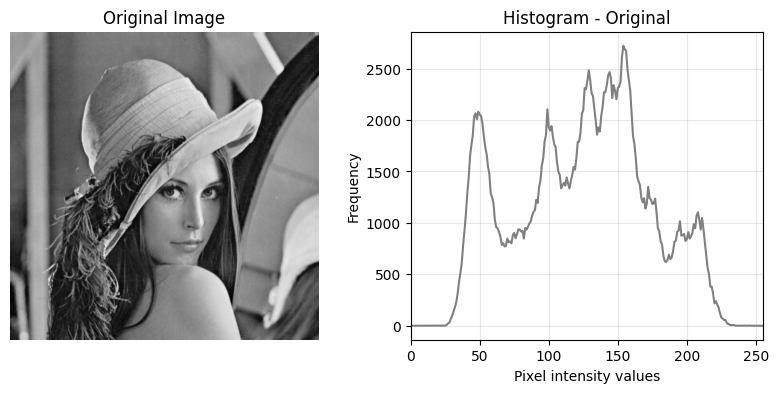

In [11]:
hist_orig = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(hist_orig, color='gray', linewidth=1.5)
plt.title('Histogram - Original')
plt.xlabel('Pixel intensity values')
plt.ylabel('Frequency')
plt.xlim(0, 255)
plt.grid(True, alpha=0.3)

plt.show()

# optional : show image with cv2
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

- Analysis:
    The histogram is clustered in the mid-range, indicating moderate contrast but room for improvement.

#### C) Implement histogram equalization

In [12]:
# Apply histogram equalization
img_equalized = cv2.equalizeHist(img)

# Histogram of equalized image
hist_eq = cv2.calcHist([img_equalized], [0], None, [256], [0, 256])

#### D) Display images and histograms side by side

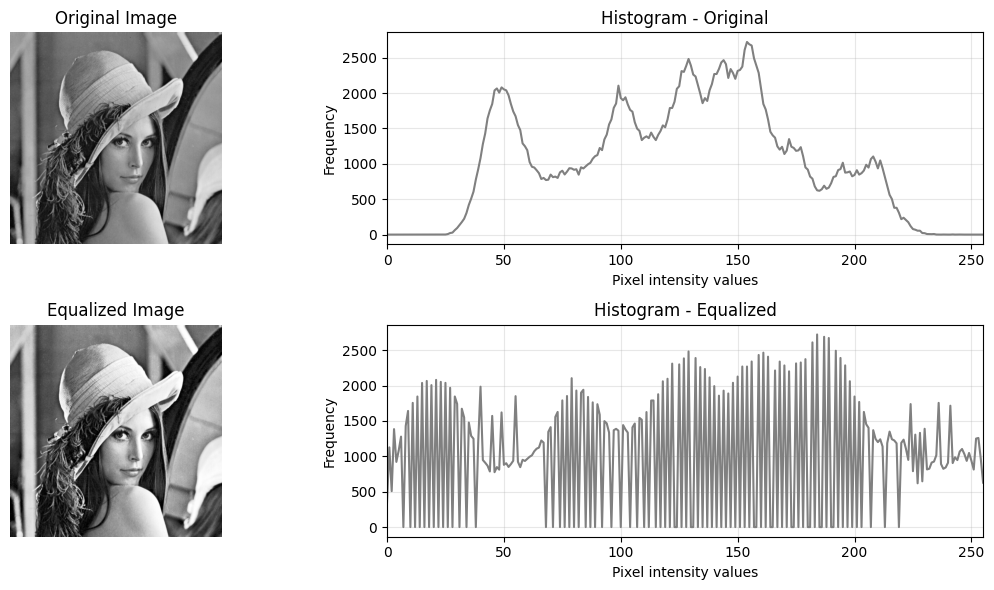

In [13]:
plt.figure(figsize=(12, 6))

# original
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.plot(hist_orig, color='gray', linewidth=1.5)
plt.title('Histogram - Original')
plt.xlabel('Pixel intensity values')
plt.ylabel('Frequency')
plt.xlim(0, 255)
plt.grid(True, alpha=0.3)

# equalized image
plt.subplot(2, 2, 3)
plt.imshow(img_equalized, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.plot(hist_eq, color='gray', linewidth=1.5)
plt.title('Histogram - Equalized')
plt.xlabel('Pixel intensity values')
plt.ylabel('Frequency')
plt.xlim(0, 255)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# optional : show image with cv2
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.imshow("Equalized", img_equalized)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### E) Visual analysis

- Visual difference: The equalised image shows much higher contrast – dark hair, skin tones, and background are clearly separated.
- Histogram effect: Original histogram is narrow; equalised histogram is flat (approximately uniform), meaning intensity values now use the full 0-255 range.

---

### Question 4
- A) The small square is to be translated by 40 pixels in both directions.
- B) The large square is to be rotated by 60 degrees counter clockwise.

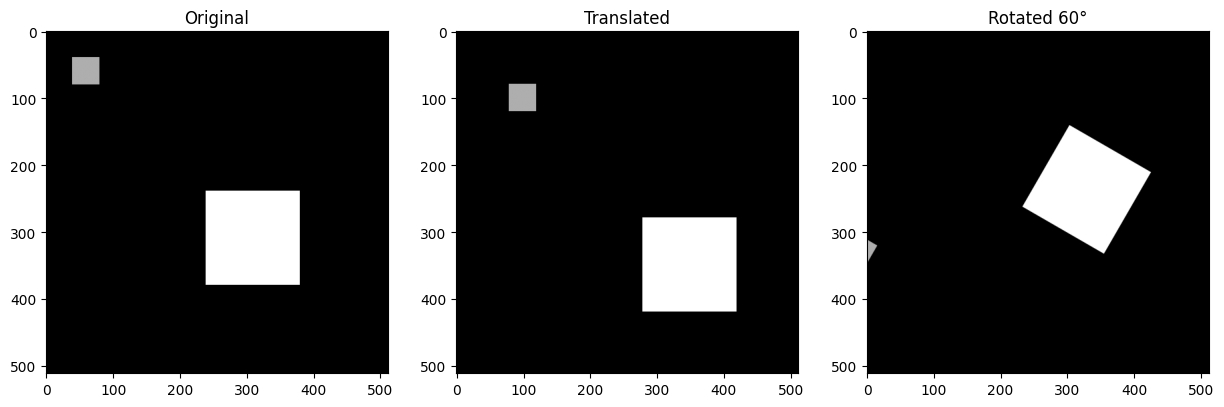

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("./required-files/square.gif", cv2.IMREAD_GRAYSCALE)      
rows, cols = img.shape[:2]

# Translate
M_trans = np.float32([[1,0,40],[0,1,40]])
trans = cv2.warpAffine(img, M_trans, (cols, rows))

# Rotate 
center = (cols//2, rows//2)
M_rot = cv2.getRotationMatrix2D(center, angle=60, scale=1.0)
rot = cv2.warpAffine(img, M_rot, (cols, rows))

# Show all 
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(1,3,2)
plt.imshow(trans, cmap='gray')
plt.title('Translated')

plt.subplot(1,3,3)
plt.imshow(rot, cmap='gray')
plt.title('Rotated 60°')

plt.show()

---

### Question 5
- For the image skeleton.gif, try to modify the normalized image using the
following functions:
    - `g(x, y)=e^(c*f(x, y))`
    - `g(x, y)=c*log10[f(x, y)+1]`
    - `g(x, y)= {if (f(x, y) < 0.1)} -> f(x, y) {else} -> 2 *f(x, y)`

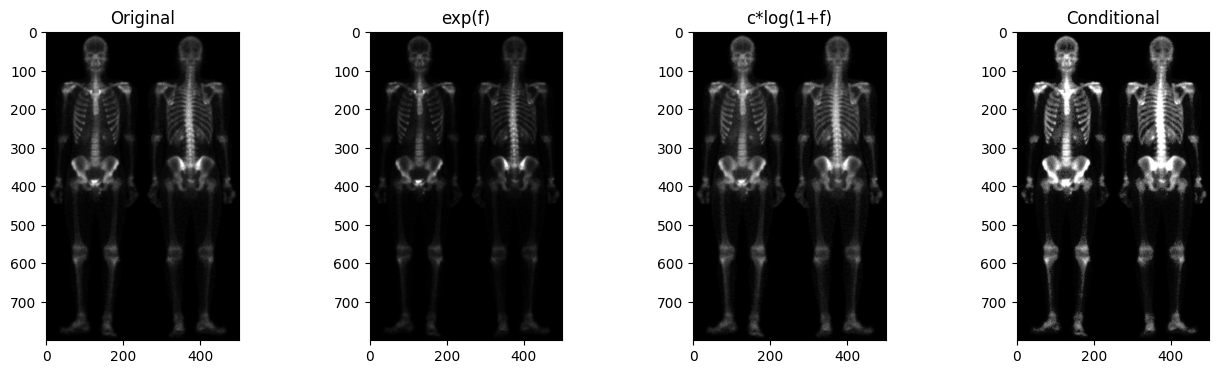

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("./required-files/skeleton.gif", cv2.IMREAD_GRAYSCALE)
f = img.astype(np.float32) / 255.0     

# 1) g = e^{c*f(x,y)}
c = 1.0 / np.log(1 + np.max(f))
g1 = c * (np.exp(f) - 1.0)
g1 = g1 / g1.max()                     

# 2) g = c * log(1 + f(x,y))
c = 1.0 / np.log(1 + np.max(f))
g2 = c * np.log(1 + f)

# 3) conditional
g3 = np.where(f < 0.1, f, 2*f)
g3 = np.clip(g3, 0, 1)

# Show results
plt.figure(figsize=(16,4))

plt.subplot(1,4,1)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(1,4,2)
plt.imshow(g1, cmap='gray')
plt.title('exp(f)')

plt.subplot(1,4,3)
plt.imshow(g2, cmap='gray')
plt.title('c*log(1+f)')

plt.subplot(1,4,4)
plt.imshow(g3, cmap='gray')
plt.title('Conditional')

plt.show()

# optional : show image with cv2
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.imshow("exp(f)", g1)
cv2.waitKey(0)
cv2.imshow("c*log(1+f)", g2)
cv2.waitKey(0)
cv2.imshow("Conditional", g3)
cv2.waitKey(0)
cv2.destroyAllWindows()

+ g1 : Extremely bright, almost white – loses all detail. Best for skeleton image? No
+ g2 : Slightly brightens dark bones while keeping background dark. Best for skeleton image? Yes – preserves bone structure and improves visibility.
+ g3 : Dark regions stay the same, brighter regions become twice as bright – creates strong. artifacts Best for skeleton image? No
